## Poission Equation
$$
\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b
$$

Discretizing,
$$
p_{i,j}^{k+1}=\frac{(p_{i+1,j}^{k}+p_{i-1,j}^{k})\Delta y^2+(p_{i,j+1}^{k}+p_{i,j-1}^{k})\Delta x^2-b_{i,j}^{k}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}
$$

Example problem:
\begin{equation}
\nabla^2 p = -2\left(\frac{\pi}{2}\right)^2\sin\left( \frac{\pi x}{L_x} \right) \cos\left(\frac{\pi y}{L_y}\right)
\end{equation}
in the domain
\left\lbrace \begin{align*}
0 &\leq x\leq 1  \\
-0.5 &\leq y \leq 0.5 
\end{align*} \right.
where $L_x = L_y = 1$ and with Dirichlet BCs
$$p=0 \text{ at } \left\lbrace 
\begin{align*}
x&=0\\
y&=0\\
y&=-0.5\\
y&=0.5
\end{align*} \right.$$

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# set the font family and size to use for Matplotlib figures
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [4]:
# parameters
nx = 41  # number of points in the x direction
ny = 41  # number of points in the y direction
xmin, xmax = 0.0, 1.0  # domain limits in the x direction
ymin, ymax = -0.5, 0.5  # domain limits in the y direction
Lx = (xmax - xmin)  # domain length in the x direction
Ly = (ymax - ymin)  # domain length in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction

# gridline locations
x = numpy.linspace(xmin, xmax, num=nx)
y = numpy.linspace(ymin, ymax, num=ny)

In [5]:
def poisson_source(x, y, Lx, Ly):
    """
    Computes and returns the source term (right-hand side) of the 
    Poisson equation.
    
    Parameters
    ----------
    x : numpy.ndarray
        The gridline locations in the x direction as a 1D array of floats
    y : numpy.ndarray
        The gridline locations in the y direction as a 1D array of floats
    Lx : float
        Domain length in the x direction
    Ly : float
        Domain length in the y direction
    
    Returns
    -------
    b : numpy.ndarray of floats
        The forcing function as a 2D array
    """
    
    X, Y = numpy.meshgrid(x, y)
    b = (-2.0 * numpy.pi / Lx * numpy.pi / Ly *
         numpy.sin(numpy.pi * X / Lx) *
         numpy.cos(numpy.pi * Y / Ly))
    
    return b

In [6]:
def l2_norm(p, p_ref):
    """
    Computes and returns the relative L2-norm of the difference between
    a solution p and a reference solution p_ref.

    Parameters
    ----------
    p : numpy.ndarray
        The solution as an array of floats
    p_ref : numpy.ndarray
        The reference solution as an array of floats

    Returns
    -------
    diff : float
        The relative L2-norm of the difference
    """
    
    l2_diff = (numpy.sqrt(numpy.sum((p - p_ref)**2)) /
               numpy.sqrt(numpy.sum(p_ref**2)))
    
    return l2_diff

In [7]:
def poisson_2d_jacobi(p0, b, dx, dy, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Poisson equation for a given forcing term using Jacobi 
    relaxation method.

    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats
    b : numpy.ndarray
        The forcing term as a 2D array of floats
    dx : float
        Grid spacing in the x direction
    dy : float
        Grid spacing in the y direction
    maxiter : integer, optional
        Maximum number of iterations to perform
        default: 20000
    rtol : float, optional
        Relative tolerance for convergence
        default: 1e-6

    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats
    ite : integer
        The number of iterations performed
    conv : list
        The convergence history as a list of floats
    """
    
    p = p0.copy()
    conv = []  # convergence history
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, :-2] + pn[1:-1, 2:]) * dy**2 +
                          (pn[:-2, 1:-1] + pn[2:, 1:-1]) * dx**2 -
                          b[1:-1, 1:-1] * dx**2 * dy**2) /
                         (2.0 * (dx**2 + dy**2)))
        
        # compute and record the relative L2-norm of the difference
        diff = l2_norm(p, pn)
        conv.append(diff)
        ite += 1
        
    return p, ite, conv

In [8]:
def plot_3d(x, y, p, label='$z$', elev=30.0, azim=45.0):
    """
    Creates a Matplotlib figure with a 3D surface plot
    of the scalar field p.

    Parameters
    ----------
    x : numpy.ndarray
        Gridline locations in the x direction as a 1D array of floats
    y : numpy.ndarray
        Gridline locations in the y direction as a 1D array of floats
    p : numpy.ndarray
        Scalar field to plot as a 2D array of floats
    label : string, optional
        Axis label to use in the third direction
        default: 'z'
    elev : float, optional
        Elevation angle in the z plane
        default: 30.0
    azim : float, optional
        Azimuth angle in the x,y plane
        default: 45.0
    """
    
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = numpy.meshgrid(x, y)
    
    ax.plot_surface(X, Y, p, cmap=cm.viridis)
    
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim=azim)

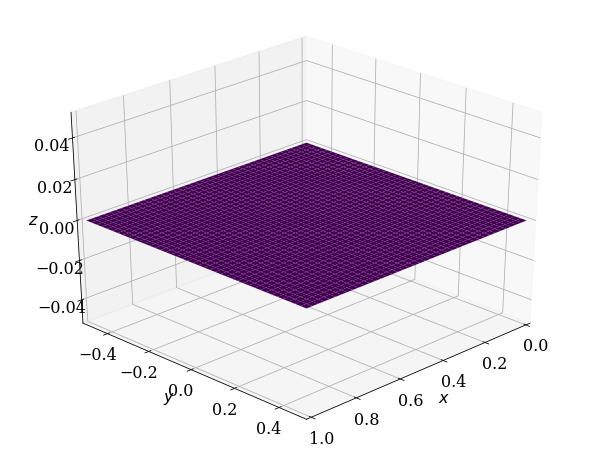

In [9]:
# ICs
p0 = numpy.zeros((ny, nx))

# compute the source term
b = poisson_source(x, y, Lx, Ly)

# plot the initial scalar field
plot_3d(x, y, p0)

In [10]:
# compute the solution using Jacobi relaxation method
p, ites, conv = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)
print('Jacobi relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(conv[-1]))

C:\Users\Kanishke\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


Jacobi relaxation: 3125 iterations to reach a relative difference of 1.9958631078740742e-07


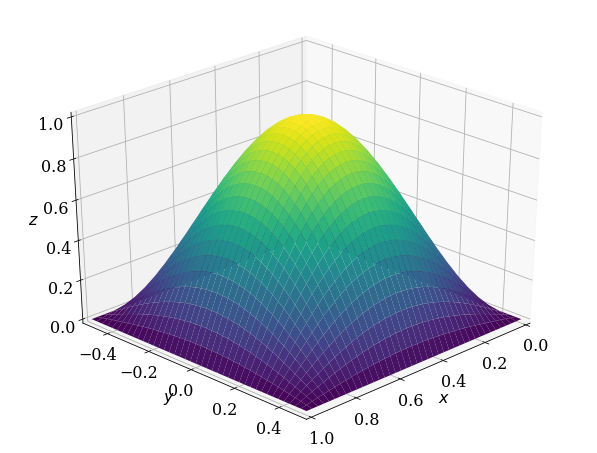

In [11]:
# plot the solution
plot_3d(x, y, p)

In [12]:
def poisson_solution(x, y, Lx, Ly):
    """
    Computes and returns the analytical solution of the Poisson equation
    on a given two-dimensional Cartesian grid.

    Parameters
    ----------
    x : numpy.ndarray
        The gridline locations in the x direction as a 1D array of floats
    y : numpy.ndarray
        The gridline locations in the y direction as a 1D array of floats
    Lx : float
        Length of the domain in the x direction
    Ly : float
        Length of the domain in the y direction

    Returns
    -------
    p : numpy.ndarray
        The analytical solution as a 2D array of floats
    """
    
    X, Y = numpy.meshgrid(x, y)
    p = numpy.sin(numpy.pi * X / Lx) * numpy.cos(numpy.pi * Y / Ly)
    
    return p

In [13]:
# compute the analytical solution
p_exact = poisson_solution(x, y, Lx, Ly)

In [14]:
# compute the relative L2-norm of the error
l2_norm(p, p_exact)

0.00044962635351969427

### Algebraic Convergence

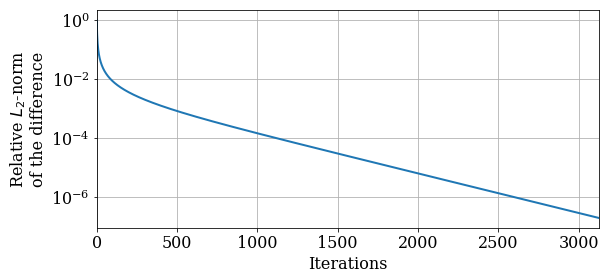

In [15]:
# plot the convergence history
pyplot.figure(figsize=(9.0, 4.0))
pyplot.xlabel('Iterations')
pyplot.ylabel('Relative $L_2$-norm\nof the difference')
pyplot.grid()
pyplot.semilogy(conv, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0, len(conv));

### Spatial Convergence

In [16]:
nx_values = [11, 21, 41, 81]
errors = []

# compute the solution and error for each grid size
for nx in nx_values:
    ny = nx  # same number of points in all directions
    dx = Lx / (nx - 1)  # grid spacing in the x direction
    dy = Ly / (ny - 1)  # grid spacing in the y direction
    
    # create the gridline locations
    x = numpy.linspace(xmin, xmax, num=nx)
    y = numpy.linspace(ymin, ymax, num=ny)
    
    # set the initial conditions
    p0 = numpy.zeros((ny, nx))
    
    # compute the source term
    b = poisson_source(x, y, Lx, Ly)
    
    # Relax the solution
    p, ites, _ = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)
    print('[nx = {}] Number of Jacobi iterations: {}'.format(nx, ites))
    
    # compute the analytical solution
    p_exact = poisson_solution(x, y, Lx, Ly)
    
    # compute and record the relative L2-norm of the error
    errors.append(l2_norm(p, p_exact))

C:\Users\Kanishke\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


[nx = 11] Number of Jacobi iterations: 249
[nx = 21] Number of Jacobi iterations: 892
[nx = 41] Number of Jacobi iterations: 3125
[nx = 81] Number of Jacobi iterations: 10708


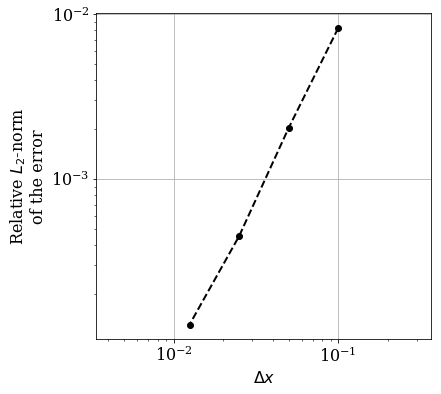

In [17]:
# plot the error versus the grid-spacing size
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors, color='black', linestyle='--', 
              linewidth=2, marker='o')
pyplot.axis('equal');